In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd

In [2]:
saratoga_temp_ppt=pd.read_csv('datasets/PRISM saratoga precip and mean temp since 1895 CSV.csv',delimiter=',')
saratoga_temp_ppt_df = pd.DataFrame(saratoga_temp_ppt)
saratoga_temp_ppt_df.columns = saratoga_temp_ppt_df.iloc[9]
saratoga_temp_ppt_df = saratoga_temp_ppt_df[10:]
saratoga_temp_ppt_df = saratoga_temp_ppt_df.reset_index(drop=True)
saratoga_temp_ppt_df.head()

9,Date,ppt (inches),tmean (degrees F)
0,1895,36.73,45.1
1,1896,40.62,45.1
2,1897,48.7,45.2
3,1898,46.68,47.1
4,1899,37.69,45.7


In [3]:
saratoga_temp_ppt_df['Date'] = pd.to_numeric(saratoga_temp_ppt_df['Date'])
saratoga_temp_ppt_df['ppt (inches)'] = pd.to_numeric(saratoga_temp_ppt_df['ppt (inches)'])
saratoga_temp_ppt_df['tmean (degrees F)'] = pd.to_numeric(saratoga_temp_ppt_df['tmean (degrees F)'])

In [4]:
x=saratoga_temp_ppt_df['Date']
y1=saratoga_temp_ppt_df['ppt (inches)']
y2=saratoga_temp_ppt_df['tmean (degrees F)']

width = .55

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax1.bar(x, y1,width = width)
ax1.set_ylabel('Precipitation (inches)')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r')
ax2.set_ylabel('Temperature (°F)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
#http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/

plt.xlabel('Year')
plt.title('Average Yearly Temp and Precipitation for Saratoga County, NY (1895-2017)')

#plt.savefig('images/two-scales-5.png')

<IPython.core.display.Javascript object>

Text(0.5,1,'Average Yearly Temp and Precipitation for Saratoga County, NY (1895-2017)')

In [5]:
saratoga_temp_ppt_2000=pd.read_csv('datasets/PRISM Saratoga monthly values jan 2000-dec 2018 Precipitation and mean temp CSV.csv',delimiter=',')
saratoga_temp_ppt_2000_df = pd.DataFrame(saratoga_temp_ppt_2000)
saratoga_temp_ppt_2000_df.columns = saratoga_temp_ppt_2000_df.iloc[9]
saratoga_temp_ppt_2000_df = saratoga_temp_ppt_2000_df[10:]
saratoga_temp_ppt_2000_df = saratoga_temp_ppt_2000_df.reset_index(drop=True)
saratoga_temp_ppt_2000_df.head()

9,Date,ppt (inches),tmean (degrees F)
0,2000-01,4.87,18.9
1,2000-02,3.19,25.5
2,2000-03,3.63,37.8
3,2000-04,5.77,43.7
4,2000-05,5.21,57.9


In [6]:
saratoga_temp_ppt_2000_df['ppt (inches)'] = pd.to_numeric(saratoga_temp_ppt_2000_df['ppt (inches)'])
saratoga_temp_ppt_2000_df['tmean (degrees F)'] = pd.to_numeric(saratoga_temp_ppt_2000_df['tmean (degrees F)'])

In [7]:
x=saratoga_temp_ppt_2000_df['Date']
y1=saratoga_temp_ppt_2000_df['ppt (inches)']
y2=saratoga_temp_ppt_2000_df['tmean (degrees F)']

width = .55

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.bar(x, y1,width = width)
ax1.set_ylabel('Precipitation (inches)')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r')
ax2.set_ylabel('Temperature (°F)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
#http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/

plt.xlabel('Year')
plt.title('Average Monthly Temp and Precipitation for Saratoga County, NY (2000-2017)')

#plt.savefig('images/two-scales-5.png')

<IPython.core.display.Javascript object>

Text(0.5,1,'Average Monthly Temp and Precipitation for Saratoga County, NY (2000-2017)')

In [8]:
date_split = saratoga_temp_ppt_2000_df["Date"].str.split("-", n = 1, expand = True) 
saratoga_temp_ppt_2000_df["Year"]= date_split[0] 
saratoga_temp_ppt_2000_df["Month"]= date_split[1] 
saratoga_temp_ppt_2000_df.drop(columns=["Date"], inplace = True) 
#https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
saratoga_temp_ppt_2000_df.head()

9,ppt (inches),tmean (degrees F),Year,Month
0,4.87,18.9,2000,01
1,3.19,25.5,2000,02
2,3.63,37.8,2000,03
3,5.77,43.7,2000,04
4,5.21,57.9,2000,05


In [9]:
saratoga_temp_ppt_2000_df.columns = ['ppt', 'tempmeanF','Year','Month']
saratoga_temp_ppt_2000_df.head()

,ppt,tempmeanF,Year,Month
0,4.87,18.9,2000,01
1,3.19,25.5,2000,02
2,3.63,37.8,2000,03
3,5.77,43.7,2000,04
4,5.21,57.9,2000,05


In [10]:
temp_mean_overall = []
Jan1_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='01'].tempmeanF.mean()
Feb2_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='02'].tempmeanF.mean()
Mar3_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='03'].tempmeanF.mean()
Apr4_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='04'].tempmeanF.mean()
May5_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='05'].tempmeanF.mean()
Jun6_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='06'].tempmeanF.mean()
Jul7_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='07'].tempmeanF.mean()
Aug8_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='08'].tempmeanF.mean()
Sept9_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='09'].tempmeanF.mean()
Oct_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='10'].tempmeanF.mean()
Nov_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='11'].tempmeanF.mean()
Dec_mean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='12'].tempmeanF.mean()

temp_mean_overall.append(Jan1_mean)
temp_mean_overall.append(Feb2_mean)
temp_mean_overall.append(Mar3_mean)
temp_mean_overall.append(Apr4_mean)
temp_mean_overall.append(May5_mean)
temp_mean_overall.append(Jun6_mean)
temp_mean_overall.append(Jul7_mean)
temp_mean_overall.append(Aug8_mean)
temp_mean_overall.append(Sept9_mean)
temp_mean_overall.append(Oct_mean)
temp_mean_overall.append(Nov_mean)
temp_mean_overall.append(Dec_mean)
temp_mean_overall
Monthslist =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
#temp_mean_overall_dict = [{'Overall Temps':temp_mean_overall,
#                           'Months':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']}]
#temp_mean_df = pd.DataFrame(temp_mean_overall_dict)
#temp_mean_df
#temp_mean_overall_dict = [{'Overall Temps':temp_mean_overall}]
#temp_mean_df = pd.DataFrame(temp_mean_overall_dict)
#temp_mean_df
df_temp=pd.DataFrame(temp_mean_overall,columns=['Overall_MeanTemp'])
df_temp['Month'] = Monthslist
#df_temp['Ppt'] = ppt_mean_overall
#df_temp=df.append({'Months':months_list}, ignore_index=True)
df_temp
#The chart is Saratoga mean temp and ppt from 1895-2017

,Overall_MeanTemp,Month
0,20.910526,Jan
1,23.552632,Feb
2,32.452632,Mar
3,45.663158,Apr
4,57.926316,May
5,65.778947,Jun
6,70.284211,Jul
7,68.936842,Aug
8,61.973684,Sept
9,49.873684,Oct


In [11]:
ppt_mean_overall = []
Jan1_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='01'].ppt.mean()
Feb2_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='02'].ppt.mean()
Mar3_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='03'].ppt.mean()
Apr4_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='04'].ppt.mean()
May5_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='05'].ppt.mean()
Jun6_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='06'].ppt.mean()
Jul7_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='07'].ppt.mean()
Aug8_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='08'].ppt.mean()
Sept9_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='09'].ppt.mean()
Oct_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='10'].ppt.mean()
Nov_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='11'].ppt.mean()
Dec_pptmean = saratoga_temp_ppt_2000_df[saratoga_temp_ppt_2000_df.Month=='12'].ppt.mean()

ppt_mean_overall.append(Jan1_pptmean)
ppt_mean_overall.append(Feb2_pptmean)
ppt_mean_overall.append(Mar3_pptmean)
ppt_mean_overall.append(Apr4_pptmean)
ppt_mean_overall.append(May5_pptmean)
ppt_mean_overall.append(Jun6_pptmean)
ppt_mean_overall.append(Jul7_pptmean)
ppt_mean_overall.append(Aug8_pptmean)
ppt_mean_overall.append(Sept9_pptmean)
ppt_mean_overall.append(Oct_pptmean)
ppt_mean_overall.append(Nov_pptmean)
ppt_mean_overall.append(Dec_pptmean)
ppt_mean_overall

df_temp['Ppt'] = ppt_mean_overall
#df_temp=df.append({'Months':months_list}, ignore_index=True)
df_temp

,Overall_MeanTemp,Month,Ppt
0,20.910526,Jan,2.897368
1,23.552632,Feb,3.135789
2,32.452632,Mar,3.559474
3,45.663158,Apr,3.866316
4,57.926316,May,4.140000
5,65.778947,Jun,5.084211
6,70.284211,Jul,4.777368
7,68.936842,Aug,4.237368
8,61.973684,Sept,3.934737
9,49.873684,Oct,4.807368


<IPython.core.display.Javascript object>


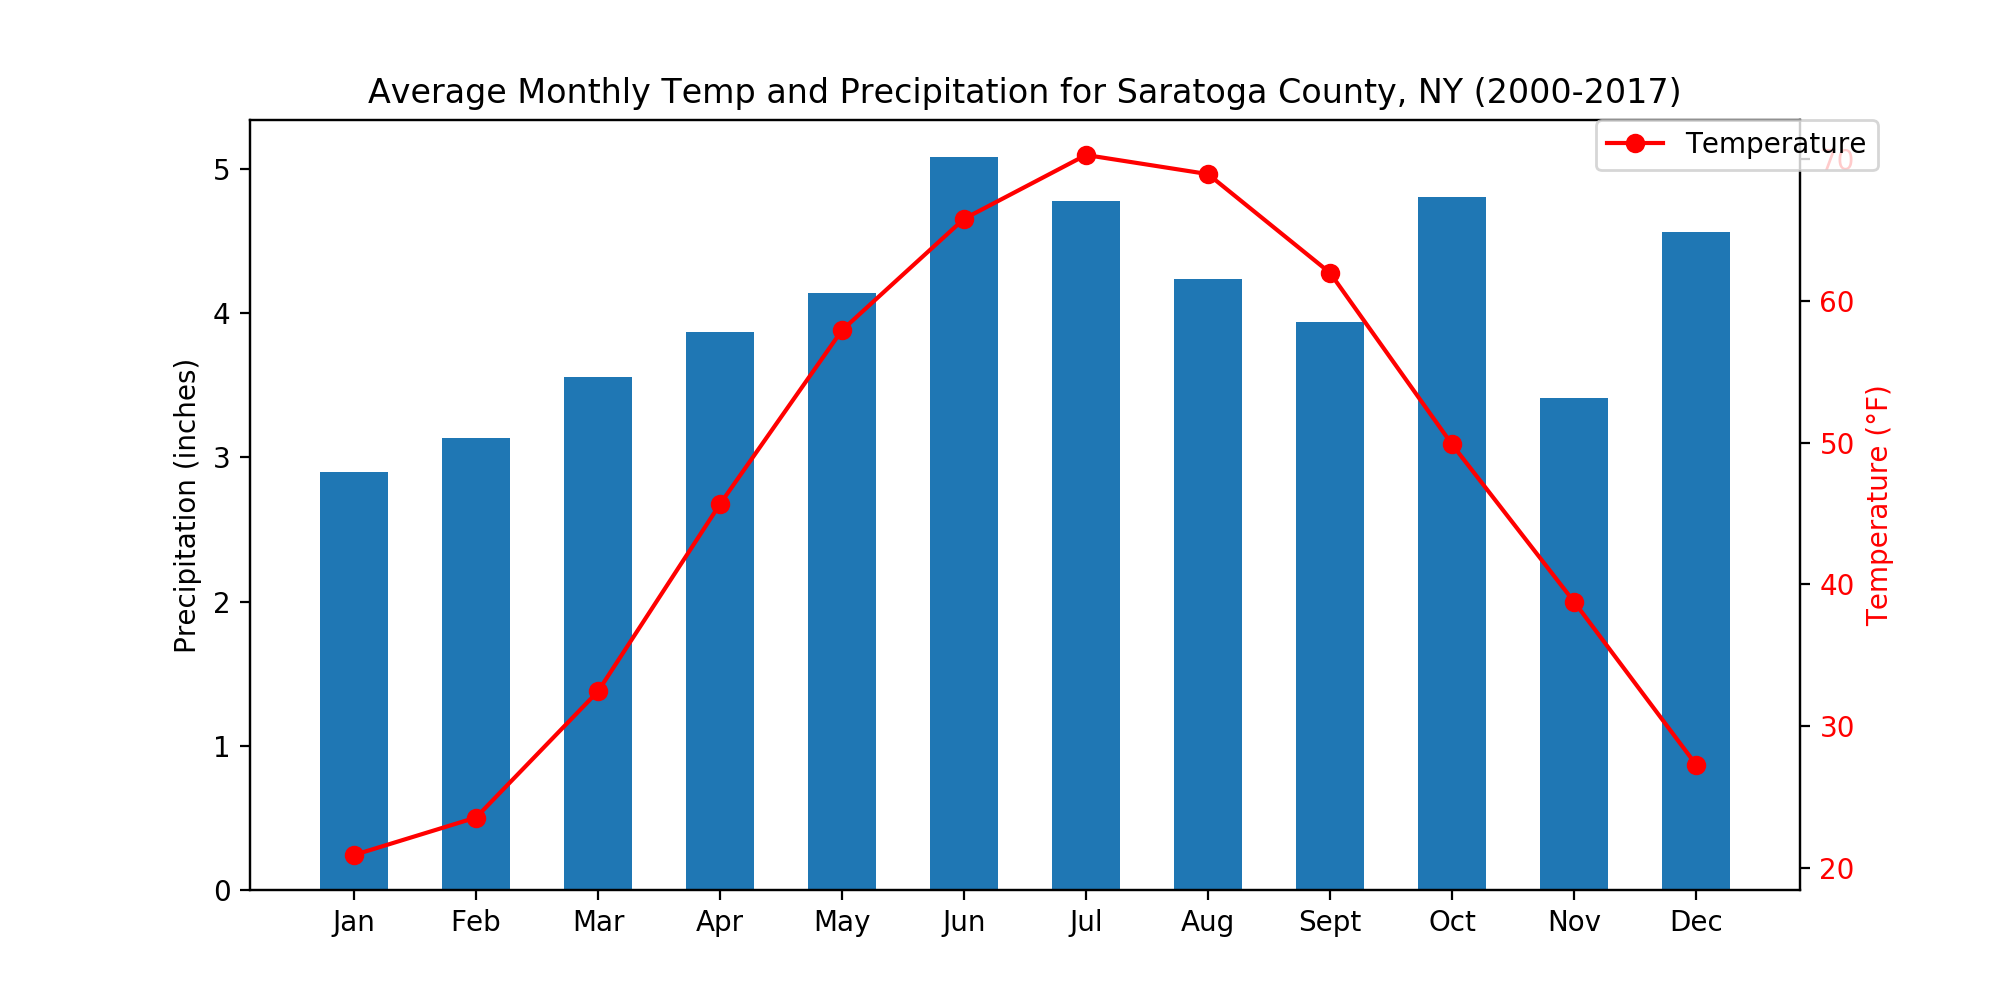

In [68]:
x=df_temp['Month']
y1=df_temp['Ppt']
y2=df_temp['Overall_MeanTemp']

width = .55

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax1.bar(x, y1,width = width,label = 'Precipitation')
ax1.set_ylabel('Precipitation (inches)')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r',marker='o',label = 'Temperature')
ax2.set_ylabel('Temperature (°F)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
#http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/
#ax1.legend(loc=0)
#lns = lns1+lns2
#labs = [l.get_label() for l in lns]
#ax1.legend(lns, labs, loc=0)
#plt.figlegend((lns1, lns2), ('label1', 'label2'), 'upper left' )
#handles, labels = ax1.get_legend_handles_labels()
#handles, labels = lns1,lns2
#fig.legend(handles, labels, loc='lower center')
#plt.legend([lns1, lns2], ['Line Up', 'Line Down'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.xlabel('Year')
plt.title('Average Monthly Temp and Precipitation for Saratoga County, NY (2000-2017)')
plt.savefig('Avg_Temp_PPT_Monthly_Saratoga_NY.png')